## Using ellc to generate light curves of tidally deformed close-in planets based on the second fluid love number.   

In [5]:
import ellc
import numpy as np
import matplotlib.pylab as plt
import batman
import astropy.constants as c
import astropy.units as u

In [90]:
print(ellc.__version__)
print("Installed from https://github.com/tundeakins/ellc")

1.8.2
Installed from https://github.com/tundeakins/ellc


We take example of WASP_103b with values from Delrez 2018 https://arxiv.org/pdf/1711.02566.pdf

In [113]:
aR = 3.010     #scaled semimajor axis a/R*
Rp = 0.115     # planet radius ratio
inc = 90    # orbital inclination
ldc_1 = [0.5343,0.1299]  #limb darkening parameters 
Mst = 1.21     #stellar mass in unit of solar masses
Mp = 1.51* c.M_jup.to( u.Msun).value    #planet mass in unit of solar masses
q = Mp/Mst      #ratio of planet to stellar mass

phases=np.linspace(-0.1,0.1,300)   #transit phases to calculate flux


In [114]:
#generate transit light curve using batman


params = batman.TransitParams()
params.t0 = 0.                      #time of inferior conjunction
params.per = 1.                     #orbital period
params.rp = Rp                     #planet radius (in units of stellar radii)
params.a = aR                      #semi-major axis (in units of stellar radii)
params.inc = inc                    #orbital inclination (in degrees)
params.ecc = 0                    #eccentricity
params.w = 90.                      #longitude of periastron (in degrees)
params.u = ldc_1               #limb darkening coefficients
params.limb_dark = "quadratic"      #limb darkening model


m = batman.TransitModel(params, phases, max_err=0.01)   #initializes model
flux_batman = m.light_curve(params)  #calculates light curve



In [115]:
#for ellc
r_1 = 1/aR    #radius of star in units of the semimajor axes
r_2 = Rp/aR   #radius of the planet in units of the semimajor axis

ellc_sphere = ellc.lc(phases,radius_1=r_1,radius_2=r_2,incl=inc,sbratio=0,
                      ld_1="quad",ldc_1=ldc_1,shape_1='sphere',shape_2='sphere',
                      grid_1="very_fine", grid_2="very_fine") 

Text(0, 0.5, 'Flux difference [ppm]')

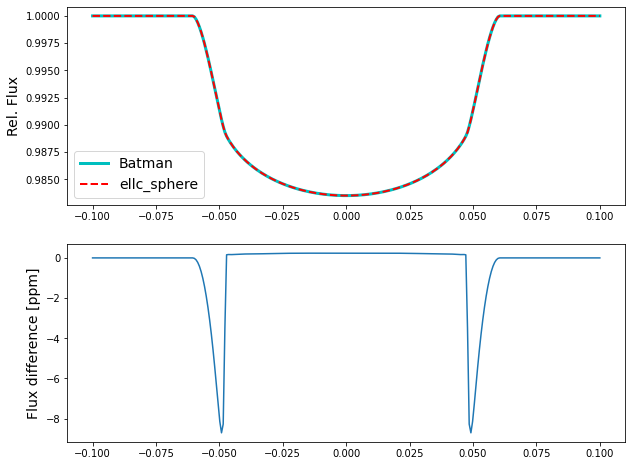

In [116]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(phases, flux_batman, "c",lw=3,label="Batman")
plt.plot(phases, ellc_sphere, "r--",lw=2,label="ellc_sphere")
plt.ylabel("Rel. Flux",fontsize=14)
plt.legend(fontsize=14)

plt.subplot(212)
plt.plot(phases, 1e6*(ellc_sphere-flux_batman))
plt.ylabel("Flux difference [ppm]",fontsize=14)


Light curve from both tools are in agreement within 10 ppm

Now to compare deformation using the love number following Akinsanmi et al 2019 https://www.aanda.org/articles/aa/pdf/2019/01/aa34215-18.pdf

The second fluid love number is given by $h_f$ and ranges from (0, 2.5) with $h_f=0$ being equivalent to a spherical planet model

Text(0.5, 0, 'Phases')

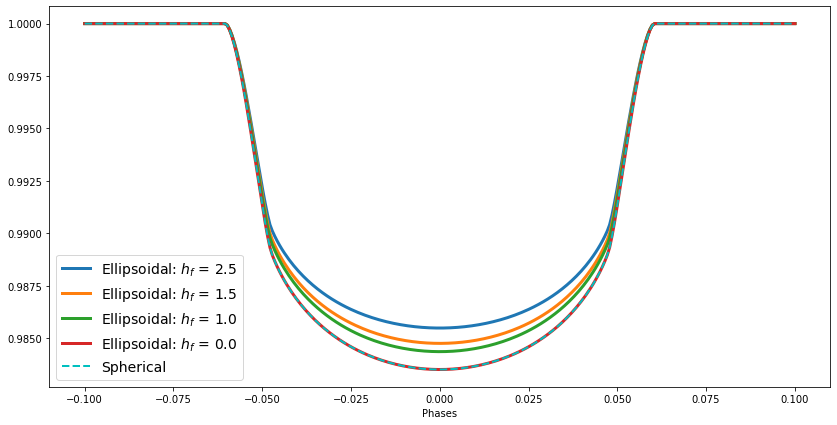

In [91]:
#set shape of the planet shape_2 = "love" and use the following values for hf:
hf=[2.5,1.5,1, 0]

plt.figure(figsize=(14,7))

for h_f in hf:
    ellc_flux = ellc.lc(phases,radius_1=r_1,radius_2=r_2,incl=inc,sbratio=0,
                      ld_1="quad",ldc_1=ldc_1,shape_1='sphere',shape_2='love',
                      q=q, hf_2= h_f, grid_1="very_fine", grid_2="very_fine") 
    plt.plot(phases, ellc_flux, label = "Ellipsoidal: $h_f$ = {:.1f}".format(h_f), lw=3)

#overplot spherical planet light curve    
plt.plot(phases, ellc_sphere, "c--",label="Spherical", lw=2)
plt.legend(fontsize=14)
plt.xlabel("Phases")

Notice that  the  light-curve  of  the  ellipsoidal model  changes  noticeably  for  different  values  of $h_f$ and  also compared to the spherical case. This is because the ellipsoidal planet projects only a small cross-section of its shape during the transit thereby leading to a lower transit depth when compared to the spherical planet. A higher $h_f$ for the same planet causes more deformation, which leads to even smaller projected cross-sectional  area and thus a shallower tansit depth.

The case  where $h_f$ = 0 (although not physical) implies no deformation to the planet so that the ellipsoidal planet model is equivalent to that of a spherical planet (red curve and dashed cyan curve)